In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/heart_disease_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data['target'].value_counts()

,count
target,
1,165
0,138


<Axes: xlabel='target', ylabel='count'>

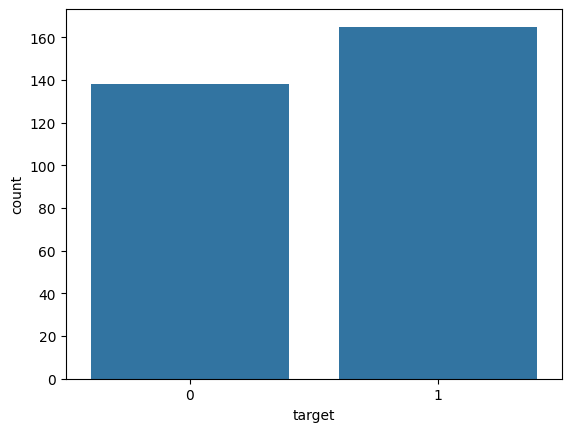

In [7]:
sns.countplot(x='target',data=data)

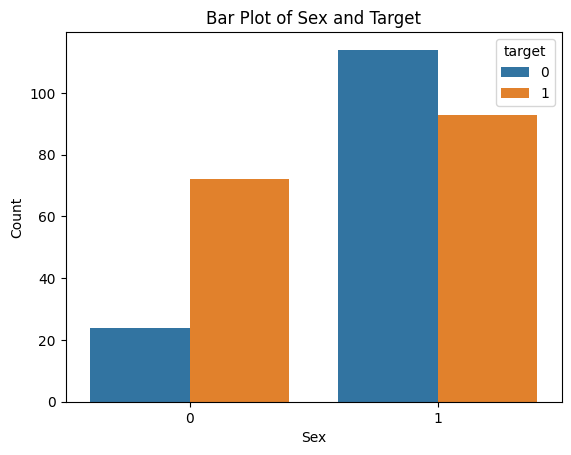

In [8]:
sns.countplot(x='sex', hue='target', data=data)

# Set plot title and labels
plt.title('Bar Plot of Sex and Target')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

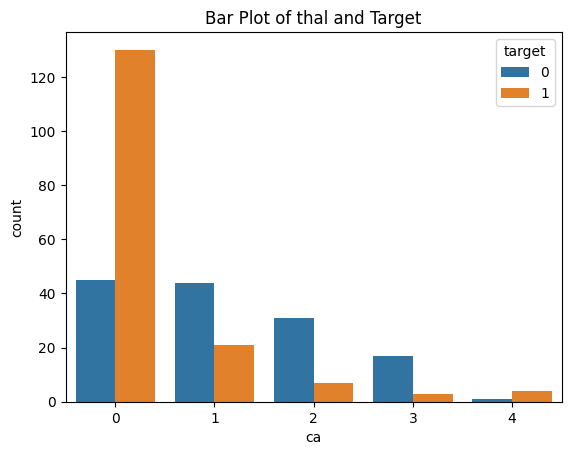

In [9]:
sns.countplot(x='ca', hue='target', data=data)

# Set plot title and labels
plt.title('Bar Plot of thal and Target')
plt.xlabel('ca')
plt.ylabel('count')

# Show the plot
plt.show()

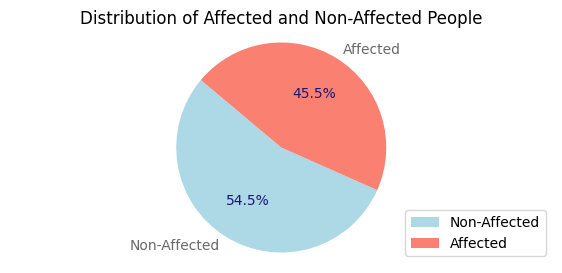

In [10]:
counts = data['target'].value_counts()

# Define labels for the pie chart
labels = ['Non-Affected', 'Affected']

# Define colors for each category
colors = ['lightblue', 'salmon']  # Non-Affected: light blue, Affected: salmon

# Plot the pie chart
plt.figure(figsize=(7, 3))
pie, texts, autotexts = plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Customize the text and autotext colors
label_color = 'dimgray'  # Choose dark grey for labels
autotext_color = 'midnightblue'  # Choose dark blue for percentage annotations

# Set the color for labels and percentage annotations
for text in texts:
    text.set_color(label_color)
for autotext in autotexts:
    autotext.set_color(autotext_color)

# Set the title of the pie chart
plt.title('Distribution of Affected and Non-Affected People')

# Create a legend and specify its location at the lower right corner
# Set `bbox_to_anchor` to control the exact location of the legend
plt.legend(pie, labels, loc='lower right', bbox_to_anchor=(1, 0))

# Ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
x = data.drop('target',axis=1)
y = data['target']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [40]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [41]:
confusion_matrix(y_test,y_pred)

array([[28,  4],
       [ 3, 26]])

In [42]:
accuracy_score(y_test,y_pred)*100

88.52459016393442

In [43]:
#Test on whole dataset
y_full_pred = nb.predict(x)
accuracy_score(y,y_full_pred)*100

83.16831683168317

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [46]:
input_data = (57,	0	,0	,120	,354	,0	,1	,163	,1	,0.6	,2	,0	,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = nb.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [47]:
import pickle  #we use pickle as to share our model with everyone using dump we save our model (model_name,open(where you have to save storage,wb = write in binary))
filename = 'heart_disease_model.sav'
pickle.dump(nb, open(filename, 'wb'))

In [48]:
pipe = pickle.load(open("heart_disease_model.sav", 'rb'))

In [50]:
for column in x.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [ ]:
input_data = (64,1,3,128,263,0,0,105,1,0.2,1,1,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = pipe.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
